In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [12]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

/var/folders/vx/0pvbqdkn4cnc765fxp6pbdg40000gn/T/ipykernel_8070/2426236682.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [13]:
df = pd.read_csv("prelim-data.csv")
df.head()

,E0,K1,K2,kT,Fz,Fx,n,b,kappa,r1,...,p3,p1sq,p2sq,p3sq,psquared,U,Usquared,Ealign,psi,AR
0,0.323,1.0,0.0,1.0,1.767,2.071,26.0,0.100,0.0,0.063543,...,3.411551,0.027631,0.219680,11.638679,11.885991,-2.624621e+49,1.051924e+99,10.577068,1.600986,0.115628
1,0.352,0.0,1.0,1.0,2.564,1.556,43.0,0.001,0.0,-0.000404,...,9.390070,0.251882,1.112650,88.173414,89.537946,-8.636510e+55,1.140345e+112,16.306139,2.023561,0.214226
2,0.406,1.0,0.0,10.0,1.170,2.392,32.0,0.010,0.0,-0.000035,...,7.177891,1.216629,0.285226,51.522124,53.023978,-1.603468e+53,4.042648e+106,17.691712,1.442147,0.100784
3,0.476,0.0,1.0,1.0,3.166,1.172,21.0,0.100,0.0,-0.156284,...,7.095803,1.151822,0.483054,50.350414,51.985290,-2.633992e+47,9.943319e+94,6.090173,1.777473,0.115527
4,0.567,1.0,0.0,0.1,2.131,2.079,35.0,0.100,0.0,-0.014727,...,11.961425,0.383028,0.151243,143.075684,143.609956,-9.735152e+49,1.461238e+100,21.099673,1.364705,0.109733


Choosing inputs + outputs 

In [14]:
X = df.iloc[:,:9]
y = df.loc[:, "Ealign"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

Importing the necessary dependencies

In [16]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

Creating Model

In [17]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape = [9]),
    layers.Dense(128, activation ="relu"),
    layers.Dropout(rate = 0.3),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(rate = 0.3), 
    layers.Dense(128, activation = "relu"),
    layers.Dropout(rate = 0.3), 
    layers.Dense(128, activation ="relu"),
    layers.Dropout(rate = 0.3),
    layers.Dense(1)
])

Epoch 1/200
2/2 [==============================] - 0s 54ms/step - loss: 13.5888 - val_loss: 11.7779
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 13.2908 - val_loss: 11.4259
Epoch 3/200
2/2 [==============================] - 0s 12ms/step - loss: 12.9738 - val_loss: 10.4290
Epoch 4/200
2/2 [==============================] - 0s 12ms/step - loss: 12.5874 - val_loss: 9.8590
Epoch 5/200
2/2 [==============================] - 0s 12ms/step - loss: 12.3430 - val_loss: 8.9179
Epoch 6/200
2/2 [==============================] - 0s 12ms/step - loss: 11.9081 - val_loss: 7.9731
Epoch 7/200
2/2 [==============================] - 0s 12ms/step - loss: 11.4094 - val_loss: 7.1183
Epoch 8/200
2/2 [==============================] - 0s 12ms/step - loss: 10.8861 - val_loss: 6.3604
Epoch 9/200
2/2 [==============================] - 0s 12ms/step - loss: 10.3336 - val_loss: 5.7735
Epoch 10/200
2/2 [==============================] - 0s 12ms/step - loss: 9.6076 - val_loss: 5.5629
Epoch 1

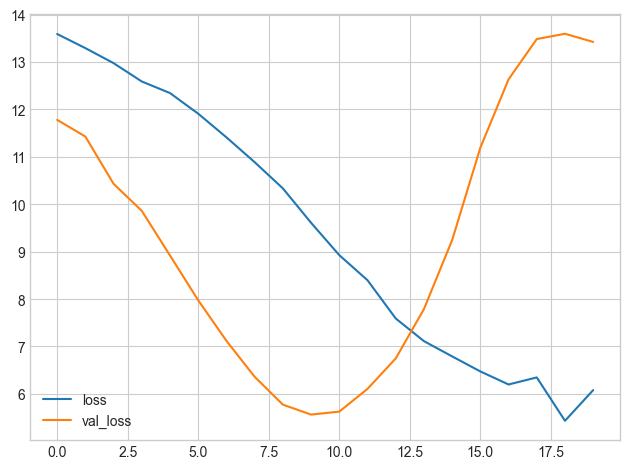

In [18]:
model.compile(
    optimizer = "adam",
    loss = "mae"
)

early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience=10,
    restore_best_weights = True,
    
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size = 128,
    epochs = 200,
    callbacks = [early_stopping],
    #verbose=0
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))